In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Considere la base de datos dada en el ```archivo taller05_datos.txt```, la cual contiene los datos de $n=1,000$ individuos en relación con las siguientes variables:
- Ingresos (en millones de pesos).
- Sexo (1 = Hombre; 0 = Mujer).

El objetivo de este ejercicio es comparar el comportamiento de los ingresos en términos del sexo.

a) Hacer una tabla de frecuencias relativas y un diagrama de barras para la variable sexo. $\\$
b) Completar la siguiente tabla y hacer un histograma con 15 categorias y un diagrama de caja para cada grupo. $\\$
c) Teniendo en cuenta los dos grupos, calcular la proporción de variabilidad debida tanto a la dispersión dentro (intravarianza) como entre (intervarianza) de los grupos. $\\$
d) Comentar los resultados obtenidos.

Punto a)
Tabla de frecuencias aboslutas y gráfica:
       Relative frequences (%)
Women                     47.5
Men                       52.5


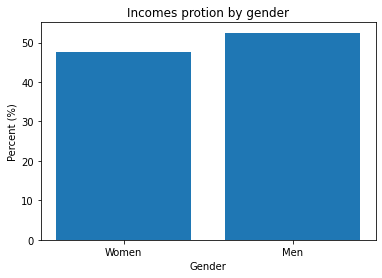

In [20]:
INCOMES_BY_GENDER = pd.read_csv('taller_05_datos.txt', sep=';', header=0)
n_individuals = INCOMES_BY_GENDER.shape[0]
men_incomes = INCOMES_BY_GENDER.loc[INCOMES_BY_GENDER['sexo'] == 1].ingresos
women_incomes = INCOMES_BY_GENDER.loc[INCOMES_BY_GENDER['sexo'] == 0].ingresos
# a -> Relative Frecuences by sex of INCOMES_BY_GENDER
incomes_nj = INCOMES_BY_GENDER.groupby(['sexo']).size()
incomes_hj = 100*incomes_nj/n_individuals
rel_frequences_table = pd.DataFrame({'Relative frequences (%)': incomes_hj })
rel_frequences_table.index = ['Women', 'Men']
fig, ax1 = plt.subplots()
ax1.bar(incomes_hj.index, incomes_hj)
plt.title('Incomes protion by gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percent (%)')
ax1.set_xticks([0, 1], ['Women', 'Men'])
print('Punto a)\nTabla de frecuencias aboslutas y gráfica:')
print(rel_frequences_table)
plt.show()


In [13]:
# b -> Complete description table and make a histogram and a boxplot
men_summary = men_incomes.describe()
men_cv = 100*men_summary['std']/men_summary['mean']
men_summary['CV %'] = men_cv
women_summary = women_incomes.describe()
women_cv = 100*women_summary['std']/women_summary['mean']
women_summary['CV %'] = women_cv
full_summary = pd.concat([women_summary, men_summary], axis=1).T
full_summary_sum = full_summary.sum(axis=0).to_frame().T
full_summary = pd.concat([full_summary, full_summary_sum], axis=0)
full_summary.index = ['Women', 'Men', 'All']
full_summary.round(3)

,count,mean,std,min,25%,50%,75%,max,CV %
Women,475.0,2.832,1.635,0.143,1.697,2.458,3.767,10.205,57.725
Men,525.0,2.857,1.625,0.053,1.731,2.485,3.619,8.385,56.877
All,1000.0,5.689,3.260,0.196,3.428,4.943,7.386,18.590,114.602


(array([0.10252226, 0.28036699, 0.28664386, 0.13390662, 0.10461455,
        0.03347666, 0.03138436, 0.01673833, 0.        , 0.00418458]),
 array([ 0.143 ,  1.1492,  2.1554,  3.1616,  4.1678,  5.174 ,  6.1802,
         7.1864,  8.1926,  9.1988, 10.205 ]),
 <BarContainer object of 10 artists>)

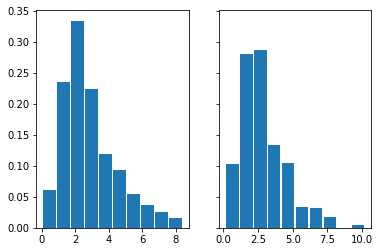

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# Create a histogram for men incomes
ax1.hist(men_incomes, range=(men_incomes.min(), men_incomes.max()), density=True, rwidth=.9)
# Create a histogram for women incomes
ax2.hist(women_incomes, range=(women_incomes.min(), women_incomes.max()), density=True, rwidth=.9)

Text(0.5, 1.0, 'Women Incomes')

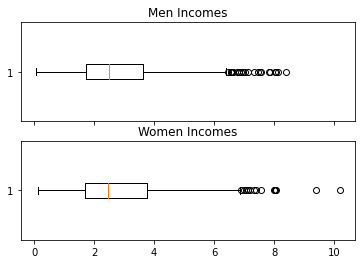

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# Create a boxplox for men incomes
ax1.boxplot(men_incomes, vert=False)
ax1.set_title('Men Incomes')
# Create a boxplox for women incomes
ax2.boxplot(women_incomes, vert=False)
ax2.set_title('Women Incomes')

In [39]:
# Pendiente intra-inter varianza
y= INCOMES_BY_GENDER.ingresos
Vt = np.var(y, ddof=1)
Vw = ((len(men_incomes)-1)*np.var(men_incomes, ddof=1) + (len(women_incomes)-1)*np.var(women_incomes, ddof=1))/(len(y)-1)
Vb = ((len(men_incomes)*(men_incomes.mean()-y.mean())**2) + (len(women_incomes)*(women_incomes.mean()-y.mean())**2))/(len(y)-1)
print(100*Vw/Vt)
print(100*Vb/Vt)

99.99421245020702
0.0057875497930214665


2. Relacione cada histograma con el diagrama de caja que representa el mismo conjunto de datos.

<center>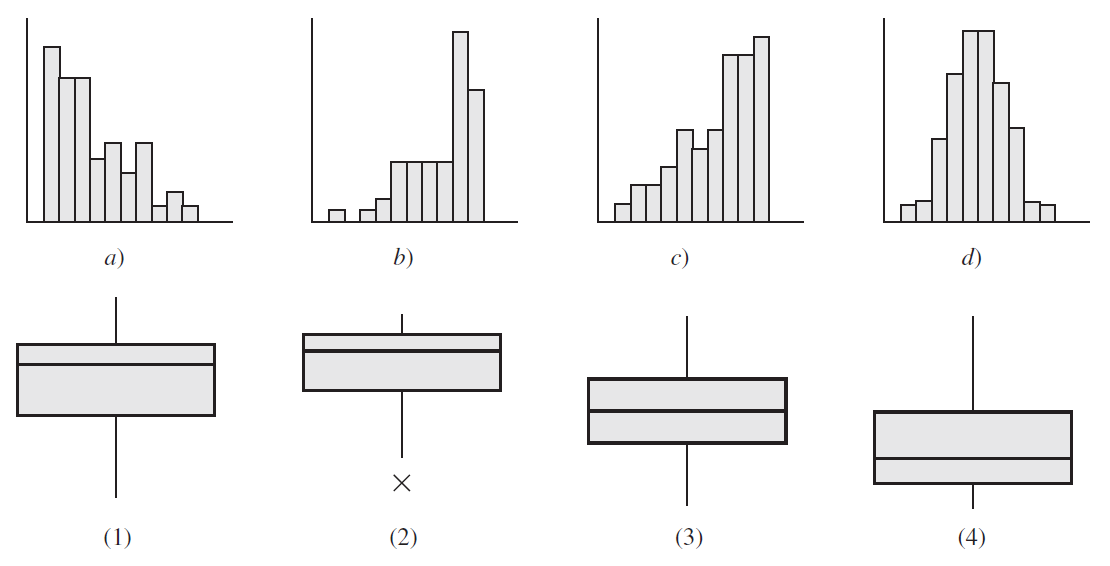</center>

- a) -> (2)
- b) -> (4)
- c) -> (1)
- d) -> (3)